# S√©rie Temporelle

## Preprocessing

### Import du dataset et split temporel

#### Import du dataset avec comme index date

In [43]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [44]:
from numba import njit, prange

from concurrent.futures import ThreadPoolExecutor, as_completed
def travail_lourd(x):
    if x == 5:
        raise ValueError("Oups, erreur volontaire pour x=5")
    time.sleep(1)
    return x * x
inputs = list(range(12))
results = []
max_workers = min(4, os.cpu_count() or 1)
with ThreadPoolExecutor(max_workers=max_workers) as exe:
    futures = {exe.submit(travail_lourd, i): i for i in inputs}
    for fut in as_completed(futures):
        i = futures[fut]
        try:
            res = fut.result()
        except Exception as e:
            print(f"T√¢che {i} a lev√© une exception : {e}")
            res = None
        results.append(res)
print("R√©sultats :", results)
@njit(parallel=True)
def somme_racines(n):
    tmp = np.zeros(n)
    for i in prange(n):
        tmp[i] = np.sqrt(i)
    return np.sum(tmp)

T√¢che 5 a lev√© une exception : Oups, erreur volontaire pour x=5
R√©sultats : [0, 1, None, 4, 9, 36, 16, 49, 64, 81, 100, 121]


In [45]:
import numpy as np
from numba import njit, prange

@njit(parallel=True)
def somme_racines(n):
    acc = 0.0
    for i in prange(n):
        acc += np.sqrt(i)
    return acc

# utilise tous les threads automatiquement
print(somme_racines(100_000_000))


666666661666.4618


In [46]:
## paths
# folder_path_M = '/Users/maximehenon/Documents/GitHub/MAR25_BDS_Compagnon_Immo/'
folder_path_Y = "C:/Users/charl/OneDrive/Documents/Yasmine/DATASCIENTEST/FEV25-BDS-COMPAGNON"
# folder_path_C = '../data/processed/Sales'
# folder_path_L= '/Users/loick.d/Documents/Datascientest/Github immo/MAR25_BDS_Compagnon_Immo/'


# Load the dataset
# output_file = os.path.join(folder_path_M, 'df_sales_clean_ST.csv')
output_file = os.path.join(folder_path_Y, "df_sales_clean_ST.csv")
# output_file = os.path.join(folder_path_C, 'df_sales_clean_ST.csv')
# output_file = os.path.join(folder_path_L, 'df_sales_clean_ST.csv')

from tqdm import tqdm
import time

# Exemple d'une boucle avec une barre de progression
for i in tqdm(range(100)):
    time.sleep(0.1)  # Simuler un traitement long
    
chunksize = 100000  # Number of rows per chunk
chunks = pd.read_csv(
    output_file,
    sep=";",
    chunksize=chunksize,
    index_col="date",
    parse_dates=["date"],
    on_bad_lines="skip",
    low_memory=False,
)
# Process chunks
df_sales_clean_ST = pd.concat(chunk for chunk in chunks).sort_values(by="date")
print(df_sales_clean_ST.index.unique().sort_values().to_series().dt.day.unique())

print(df_sales_clean_ST.groupby("date")["INSEE_COM"].nunique().head(12))

display(df_sales_clean_ST.head())



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:10<00:00,  9.83it/s]


[1]
date
2019-02-01     3237
2019-03-01     1983
2019-04-01     2603
2019-05-01     3570
2019-06-01     2559
2019-07-01     2367
2019-08-01     3349
2019-09-01     3447
2019-10-01     1812
2019-11-01     3279
2019-12-01     2855
2020-01-01    18634
Name: INSEE_COM, dtype: int64


typedebien typedetransaction  etage  surface  surface_terrain  \
date                                                                       
2019-02-01         an                 v    0.0     84.0              NaN   
2019-02-01         an                 v    0.0    127.0              NaN   
2019-02-01          m                 v    0.0    149.0              NaN   
2019-02-01         an                 v    0.0     45.0              NaN   
2019-02-01         an                 v    0.0     20.0              NaN   

            nb_pieces  balcon  eau  bain dpeL  ...  \
date                                           ...   
2019-02-01        4.0       0  0.0   0.0  NaN  ...   
2019-02-01        5.0       0  0.0   0.0  NaN  ...   
2019-02-01        6.0       0  0.0   2.0  NaN  ...   
2019-02-01        2.0       0  0.0   0.0  NaN  ...   
2019-02-01        1.0       0  0.0   0.0  NaN  ...   

            loyer_m2_median_n7_outlier_flag_outlier_flag  \
date                                                       
2019-02-01                                             0   
2019-02-01                                             0   
2019-02-01                                             0   
2019-02-01                                             0   
2019-02-01                                             0   

            nb_log_n7_outlier_flag_outlier_flag  \
date                                              
2019-02-01                                    0   
2019-02-01                                    0   
2019-02-01                                    0   
2019-02-01                                    0   
2019-02-01                                    0   

            taux_rendement_n7_outlier_flag_outlier_flag  \
date                                                      
2019-02-01                                            0   
2019-02-01                                            0   
2019-02-01                                            0   
2019-02-01                                            0   
2019-02-01                                            0   

            avg_purchase_price_m2_outlier_flag_outlier_flag  \
date                                                          
2019-02-01                                                0   
2019-02-01                                                0   
2019-02-01                                                0   
2019-02-01                                                0   
2019-02-01                                                0   

            avg_rent_price_m2_outlier_flag_outlier_flag  \
date                                                      
2019-02-01                                            0   
2019-02-01                                            0   
2019-02-01                                            0   
2019-02-01                                            0   
2019-02-01                                            0   

            rental_yield_pct_outlier_flag_outlier_flag  \
date                                                     
2019-02-01                                           0   
2019-02-01                                           0   
2019-02-01                                           0   
2019-02-01                                           0   
2019-02-01                                           0   

           IPS_primaire_outlier_flag_outlier_flag  \
date                                                
2019-02-01                                      0   
2019-02-01                                      0   
2019-02-01                                      0   
2019-02-01                                      0   
2019-02-01                                      0   

           prix_m2_vente_outlier_flag_outlier_flag Year_outlier_flag  \
date                                                                   
2019-02-01                                       0                 0   
2019-02-01                                       0     

#### Ajout de la variable code postal

In [47]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# === 2. CHARGEMENT DES POLYGONES DE CODES POSTAUX ===
## Paths
# folder_path_M = '/Users/maximehenon/Documents/GitHub/MAR25_BDS_Compagnon_Immo/'
# folder_path_Y = "C:/Users/charl/OneDrive/Documents/Yasmine/DATASCIENTEST/FEV25-BDS-COMPAGNON/"
folder_path_C = '../data/geo/json'


geo_file_name = 'contours-codes-postaux.geojson'
input_file = os.path.join(folder_path_C, geo_file_name)

pcodes = gpd.read_file(input_file)[['codePostal', 'geometry']]
print("Polygones charg√©s :", pcodes.shape)
df_sales_clean_ST = df_sales_clean_ST.reset_index()

# === 4. PR√âTRAITEMENT GEO ===
df_base = df_sales_clean_ST.copy()

df_base = df_base.dropna(subset=['mapCoordonneesLatitude', 'mapCoordonneesLongitude'])
df_base['lat'] = df_base['mapCoordonneesLatitude']#.round(3)
df_base['lon'] = df_base['mapCoordonneesLongitude']#.round(3)
df_base['orig_index'] = df_base.index

# === 5. FONCTION DE TRAITEMENT SPATIAL D'UN CHUNK ===
def process_chunk(chunk, pcodes):
    chunk = chunk.copy()
    chunk['geometry'] = gpd.points_from_xy(chunk['lon'], chunk['lat'])
    gdf = gpd.GeoDataFrame(chunk, geometry='geometry', crs='EPSG:4326')
    joined = gpd.sjoin(gdf, pcodes, how='left', predicate='within')
    return joined[['orig_index', 'codePostal']]  # retour minimal

# === 6. TRAITEMENT PAR CHUNKS POUR LIMITER LA M√âMOIRE ===
chunksize = 100_000
results = []

for i in range(0, len(df_base), chunksize):
    #print(f"Traitement du chunk {i} ‚Üí {i+chunksize}")
    chunk = df_base.iloc[i:i+chunksize]
    result = process_chunk(chunk, pcodes)
    results.append(result)

# === 7. CONCAT√âNATION DES R√âSULTATS ET MERGE FINAL ===
df_joined = pd.concat(results, ignore_index=True).drop_duplicates("orig_index")

df_sales_clean_ST['orig_index'] = df_sales_clean_ST.index  # pour merge

df_sales_clean_ST = df_sales_clean_ST.merge(df_joined[['orig_index', 'codePostal']], on="orig_index", how="left")
df_sales_clean_ST.drop(columns=['orig_index'], inplace=True)

# === 8. V√âRIFICATION DU R√âSULTAT ===
print(df_sales_clean_ST[['mapCoordonneesLatitude', 'mapCoordonneesLongitude', 'codePostal', 'date']].head())
print("Code postal manquant :", df_sales_clean_ST['codePostal'].isna().sum())

Polygones charg√©s : (6158, 2)
   mapCoordonneesLatitude  mapCoordonneesLongitude codePostal       date
0                48.86145                  2.17940      92500 2019-02-01
1                45.77299                  6.58753        NaN 2019-02-01
2                49.66212                  3.36596      02800 2019-02-01
3                43.61687                  1.32916      31770 2019-02-01
4                48.11889                 -1.68881      35000 2019-02-01
Code postal manquant : 93808


#### Agr√©gation mensuelle 

In [48]:
df_sales_clean_ST['date'] = pd.to_datetime(df_sales_clean_ST['date'], errors='coerce')
df_sales_clean_ST = df_sales_clean_ST.sort_values('date')

# D√©finir la colonne 'date' comme index
df_sales_clean_ST = df_sales_clean_ST.set_index('date')


# Creation des variable ann√©e et mois et traiter le codePostal

df_sales_clean_ST["Year"] = df_sales_clean_ST.index.year
df_sales_clean_ST["Month"] = df_sales_clean_ST.index.month

df_sales_clean_ST["codePostal"] = df_sales_clean_ST["codePostal"].astype(str).str.replace(r"\.0$", "", regex=True)

datetime_cols = df_sales_clean_ST.select_dtypes(include=["datetime64[ns]"]).columns

for col in datetime_cols:
    print(f"Colonne datetime : {col}")
    print(df_sales_clean_ST[col].unique())


# corriger les valeurs de la colonne 'codePostal'
for code in df_sales_clean_ST["codePostal"].unique():
    if len(str(code)) < 5:
        code = str(code).zfill(5)
    # Convert 'codePostal' to string
df_sales_clean_ST["codePostal"] = df_sales_clean_ST["codePostal"].astype(str)
display(df_sales_clean_ST.head())


typedebien typedetransaction  etage  surface  surface_terrain  \
date                                                                       
2019-02-01         an                 v    0.0     84.0              NaN   
2019-02-01          a                 v    2.0     63.0              NaN   
2019-02-01         an                 v    0.0     73.0              NaN   
2019-02-01          m                 v    0.0    103.0              NaN   
2019-02-01          a                 v    5.0     94.0              NaN   

            nb_pieces  balcon  eau  bain dpeL  ...  \
date                                           ...   
2019-02-01        4.0       0  0.0   0.0  NaN  ...   
2019-02-01        3.0       0  1.0   0.0    C  ...   
2019-02-01        4.0       0  0.0   0.0  NaN  ...   
2019-02-01        4.0       0  1.0   1.0    D  ...   
2019-02-01        3.0       0  0.0   1.0    C  ...   

            nb_log_n7_outlier_flag_outlier_flag  \
date                                              
2019-02-01                                    0   
2019-02-01                                    0   
2019-02-01                                    0   
2019-02-01                                    0   
2019-02-01                                    0   

            taux_rendement_n7_outlier_flag_outlier_flag  \
date                                                      
2019-02-01                                            0   
2019-02-01                                            0   
2019-02-01                                            0   
2019-02-01                                            0   
2019-02-01                                            0   

            avg_purchase_price_m2_outlier_flag_outlier_flag  \
date                                                          
2019-02-01                                                0   
2019-02-01                                                0   
2019-02-01                                                0   
2019-02-01                                                0   
2019-02-01                                                0   

            avg_rent_price_m2_outlier_flag_outlier_flag  \
date                                                      
2019-02-01                                            0   
2019-02-01                                            0   
2019-02-01                                            0   
2019-02-01                                            0   
2019-02-01                                            0   

            rental_yield_pct_outlier_flag_outlier_flag  \
date                                                     
2019-02-01                                           0   
2019-02-01                                           0   
2019-02-01                                           0   
2019-02-01                                           0   
2019-02-01                                           0   

            IPS_primaire_outlier_flag_outlier_flag  \
date                                                 
2019-02-01                                       0   
2019-02-01                                       0   
2019-02-01                                       0   
2019-02-01                                       0   
2019-02-01                                       0   

           prix_m2_vente_outlier_flag_outlier_flag Year_outlier_flag  \
date                                                                   
2019-02-01                                       0                 0   
2019-02-01                                       0                 0   
2019-02-01                                       0                 0   
2019-02-01                                       0                 0   
2019-02-01                                       0                 0   

           Month_outlier_flag  codePostal  
date                                       
2019-02-01                  0       92500  
2019-02-01                  0       83000  
2019

#### Split Train et Test

In [49]:
# SPLIT

train_clean = df_sales_clean_ST[
    (df_sales_clean_ST["Year"] < 2024) & (df_sales_clean_ST["Year"] > 2019)
]
test_clean = df_sales_clean_ST[df_sales_clean_ST["Year"] >= 2024]

display(test_clean.head())
test_clean = test_clean.reset_index()
train_clean = train_clean.reset_index()
display(train_clean["codePostal"].head())
display(train_clean[train_clean["codePostal"] =="75019"].head())

typedebien typedetransaction  etage  surface  surface_terrain  \
date                                                                       
2024-01-01          m                 v    0.0    101.0            278.0   
2024-01-01          m                 v    0.0     89.0            678.0   
2024-01-01          a                 v    2.0     54.0              NaN   
2024-01-01          m                 v    0.0    117.0            839.0   
2024-01-01          m                 v    0.0    147.0           1398.0   

            nb_pieces  balcon  eau  bain dpeL  ...  \
date                                           ...   
2024-01-01        5.0       0  0.0   0.0    A  ...   
2024-01-01        5.0       0  0.0   0.0    A  ...   
2024-01-01        3.0       0  0.0   0.0    D  ...   
2024-01-01        6.0       0  1.0   1.0    D  ...   
2024-01-01        5.0       0  1.0   0.0    E  ...   

            nb_log_n7_outlier_flag_outlier_flag  \
date                                              
2024-01-01                                    0   
2024-01-01                                    0   
2024-01-01                                    0   
2024-01-01                                    0   
2024-01-01                                    0   

            taux_rendement_n7_outlier_flag_outlier_flag  \
date                                                      
2024-01-01                                            0   
2024-01-01                                            0   
2024-01-01                                            0   
2024-01-01                                            0   
2024-01-01                                            0   

            avg_purchase_price_m2_outlier_flag_outlier_flag  \
date                                                          
2024-01-01                                                0   
2024-01-01                                                0   
2024-01-01                                                0   
2024-01-01                                                0   
2024-01-01                                                0   

            avg_rent_price_m2_outlier_flag_outlier_flag  \
date                                                      
2024-01-01                                            0   
2024-01-01                                            0   
2024-01-01                                            0   
2024-01-01                                            0   
2024-01-01                                            0   

            rental_yield_pct_outlier_flag_outlier_flag  \
date                                                     
2024-01-01                                           0   
2024-01-01                                           0   
2024-01-01                                           0   
2024-01-01                                           0   
2024-01-01                                           0   

            IPS_primaire_outlier_flag_outlier_flag  \
date                                                 
2024-01-01                                       0   
2024-01-01                                       0   
2024-01-01                                       0   
2024-01-01                                       0   
2024-01-01                                       0   

           prix_m2_vente_outlier_flag_outlier_flag Year_outlier_flag  \
date                                                                   
2024-01-01                                       0                 1   
2024-01-01                                       0                 1   
2024-01-01                                       0                 1   
2024-01-01                                       0                 1   
2024-01-01                                       0                 1   

           Month_outlier_flag  codePostal  
date                                       
2024-01-01                  0       57440  
2024-01-01                  0       60540  
2024

0    83310
1    81000
2    01090
3    44380
4    25420
Name: codePostal, dtype: object

date typedebien typedetransaction  etage  surface  surface_terrain  \
948  2020-01-01          a                 v    1.0     86.0              NaN   
2265 2020-01-01          a                 v    0.0    162.0              NaN   
3110 2020-01-01          a                 v    0.0     62.0              NaN   
3215 2020-01-01          a                 v    0.0     56.0              NaN   
5053 2020-01-01          a                 v    8.0     70.0              NaN   

      nb_pieces  balcon  eau  bain  ... nb_log_n7_outlier_flag_outlier_flag  \
948         4.0       0  2.0   0.0  ...                                   0   
2265        5.0       0  1.0   1.0  ...                                   0   
3110        3.0       0  0.0   0.0  ...                                   0   
3215        3.0       0  0.0   1.0  ...                                   0   
5053        3.0       1  0.0   1.0  ...                                   0   

      taux_rendement_n7_outlier_flag_outlier_flag  \
948                                             0   
2265                                            0   
3110                                            0   
3215                                            0   
5053                                            0   

      avg_purchase_price_m2_outlier_flag_outlier_flag  \
948                                                 0   
2265                                                0   
3110                                                0   
3215                                                0   
5053                                                0   

      avg_rent_price_m2_outlier_flag_outlier_flag  \
948                                             0   
2265                                            0   
3110                                            0   
3215                                            0   
5053                                            0   

      rental_yield_pct_outlier_flag_outlier_flag  \
948                                            0   
2265                                           0   
3110                                           0   
3215                                           0   
5053                                           0   

      IPS_primaire_outlier_flag_outlier_flag  \
948                                        0   
2265                                       0   
3110                                       0   
3215                                       0   
5053                                       0   

      prix_m2_vente_outlier_flag_outlier_flag Year_outlier_flag  \
948                                         0                 0   
2265                                        0                 0   
3110                                        0                 0   
3215                                        0                 0   
5053                                        0                 0   

     Month_outlier_flag codePostal  
948                   0      75019  
2265                  0      75019  
3110                  0      75019  
3215                  0      75019  
5053                  0      75019  

[5 rows x 97 columns]

#### Analyse des tendances

##### Agr√©gation des donn√©es par mois

In [50]:
train_clean["departement"] = train_clean["codePostal"].astype(str).str[:2]
test_clean["departement"] = test_clean["codePostal"].astype(str).str[:2]

train_copy = train_clean.copy()

train_mensuel = (
    train_copy.groupby(["Year", "Month", "departement", "codePostal"])
    .agg(prix_m2_vente=("prix_m2_vente", "mean"))
    .reset_index()
)




##### Formattage des donn√©es temporelles

In [51]:
# Pour le mensuel
train_mensuel["date"] = pd.to_datetime(
    train_mensuel["Year"].astype(str) + "-" + train_mensuel["Month"].astype(str) + "-01"
)

##### Visualisation

In [52]:
import plotly.express as px
import pandas as pd

Train_pour_graph = (
    train_clean.groupby(["Year", "Month"])
    .agg(prix_m2_vente=("prix_m2_vente", "mean"))
    .reset_index()
)

Train_pour_graph["date"] = pd.to_datetime(
    Train_pour_graph["Year"].astype(str)
    + "-"
    + Train_pour_graph["Month"].astype(str)
    + "-01"
)

###########################################
# Filtrage avec des dropdowns par departement

fig_mensuel_glob = px.line(
    Train_pour_graph,
    x="date",
    y="prix_m2_vente",
    title="√âvolution mensuelle du prix moyen au m¬≤ ",
    labels={"date": "Date", "prix_m2_vente": "Prix moyen (‚Ç¨ / m¬≤)"},
)

fig_mensuel_glob.update_traces(mode="lines+markers")
fig_mensuel_glob.update_layout(
    title_x=0.5,
    title_y=0.95,
    title_font_size=20,
    xaxis_title="Date",
    yaxis_title="Prix moyen (‚Ç¨ / m¬≤)",
    hovermode="x unified",
)

fig_mensuel_glob.update_xaxes(title_font=dict(size=14), tickfont=dict(size=12))
fig_mensuel_glob.update_yaxes(title_font=dict(size=14), tickfont=dict(size=12))
fig_mensuel_glob.show()

###########################################
# Filtrage avec des dropdowns par departement
Train_pour_graph_cp = (
    train_clean.groupby(["Year", "Month", "departement"])
    .agg(prix_m2_vente=("prix_m2_vente", "mean"))
    .reset_index()
)
Train_pour_graph_cp["date"] = pd.to_datetime(
    Train_pour_graph_cp["Year"].astype(str)
    + "-"
    + Train_pour_graph_cp["Month"].astype(str)
    + "-01"
)

fig_mensuel = px.line(
    Train_pour_graph_cp,
    x="date",
    y="prix_m2_vente",
    color="departement",
    title="√âvolution mensuelle du prix moyen au m¬≤ par departement",
    labels={
        "date": "Date",
        "prix_m2_vente": "Prix moyen (‚Ç¨ / m¬≤)",
        "departement": "departement",
    },
)

fig_mensuel.update_traces(mode="lines+markers")
fig_mensuel.update_layout(
    title_x=0.5,
    title_y=0.95,
    title_font_size=20,
    xaxis_title="Date",
    yaxis_title="Prix moyen (‚Ç¨ / m¬≤)",
    legend_title_text="departement",
    hovermode="x unified",
)

fig_mensuel.update_xaxes(title_font=dict(size=14), tickfont=dict(size=12))
fig_mensuel.update_yaxes(title_font=dict(size=14), tickfont=dict(size=12))

# Ajout de menus d√©roulants pour filtrer par departement et ann√©e
departement = train_mensuel["departement"].unique()

# Menu pour filtrer par departement
departement_buttons = [
    dict(
        label=str(cp),
        method="update",
        args=[
            {"visible": [cp == c for c in departement]},
            {"title": f"√âvolution mensuelle pour le departement {cp}"},
        ],
    )
    for cp in departement
]

fig_mensuel.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=departement_buttons,
            direction="down",
            showactive=True,
            x=1.15,
            xanchor="left",
            y=1.1,
            yanchor="top",
            pad={"r": 10, "t": 10},
            bgcolor="white",
            bordercolor="black",
            borderwidth=1,
        )
    ]
)

fig_mensuel.show()

Pour mieux expliquer l'√©volution de la Target, nous ajoutons les taux immobilier √† notre set de donn√©e

## Enrichissement du dataset

Pour mieux adresser le probl√®me, nous allons proc√©der √† la segmentation des departements afin d'adresser les prix par segment g√©ographique
Par exemple sur les biens immobiliers comme Paris, nous allons l'enrichir par des donn√©es de taux d'emprunt immobilier, taux de chomage, ...

### Extraction des indicateurs pour clustering

#### Ajustement de la granularit√© pour le clustering


##### Constat initial

Nous avons commenc√© par r√©aliser un clustering par code postal, en utilisant des indicateurs agr√©g√©s par `codePostal` (prix moyen, √©cart-type, taux de croissance annuel moyen, etc.).  
Cependant, au fil de l'analyse, nous avons constat√© que **de nombreux codes postaux disposaient de tr√®s peu de donn√©es**, parfois **moins de 5 ventes**.

Cela posait plusieurs probl√®mes :
- Les statistiques calcul√©es (moyenne, √©cart-type, TCAM) √©taient **peu fiables**.
- Ces points faiblement renseign√©s pouvaient **brouiller le clustering** global.

##### Seuil critique observ√©

Nous avons observ√© que :
- Certains `codePostal` n'avaient **qu'une seule entr√©e**.
- Le seuil de **10 observations** est un minimum g√©n√©ralement admis pour calculer des agr√©gations fiables.

##### Solution mise en ≈ìuvre : **agr√©gation hybride**

Pour conserver √† la fois **la pr√©cision locale** quand elle est disponible, et **la stabilit√© statistique** ailleurs, nous avons adopt√© une strat√©gie hybride :

- Si un `codePostal` contient **au moins 10 observations**, il est **conserv√© tel quel**.
- Sinon, il est **regroup√© au niveau du d√©partement** (`codePostal[:2]`).

Nous avons donc cr√©√© une nouvelle colonne appel√©e `zone_mixte`, qui contient :
- soit le code postal complet (`75001`, `13008`, etc.)
- soit le code d√©partemental (`30`, `32`, `97`, etc.)

##### Objectif

Cette approche permet de :
- **Pr√©server la finesse g√©ographique** dans les zones bien renseign√©es,
- **Limiter le bruit** dans les zones sous-repr√©sent√©es,
- Am√©liorer la **qualit√© du clustering** sans perdre d'information utile.



#### Cr√©ation de la variable hybride 'Zone Mixte' - Departement & Code Postal

In [53]:
# On s'assure que les codes postaux sont bien au format 5 chiffres

train_clean["date"] = pd.to_datetime(train_clean["date"])
test_clean ["date"] = pd.to_datetime(test_clean ["date"])

# On garde les codes postaux fr√©quents
cp_counts = train_clean["codePostal"].value_counts()
cp_frequents_str = set(cp_counts[cp_counts >= 10].index)


# Fonction hybride
def regroup_code(row, frequents_set):
    cp = row["codePostal"]
    if cp in frequents_set:
        return cp  # code postal d√©taill√©
    elif cp.startswith("97"):
        return cp[:3]  # DROM-COM
    elif cp.isdigit() and len(cp) == 5:
        return cp[:2]  # d√©partement
    else:
        return "inconnu"


#  Application sur train et test
train_clean["zone_mixte"] = train_clean.apply(
    lambda row: regroup_code(row, cp_frequents_str), axis=1
)

# Pour test_clean, on applique exactement la m√™me logique sans recalculer les fr√©quences
test_clean["zone_mixte"] = test_clean.apply(
    lambda row: regroup_code(row, cp_frequents_str), axis=1
)

##### construction d'un jeu d'entrainement avec la variable 'Zone Mixte' et un lag -1

In [54]:
for df in (train_clean, test_clean):
    df.sort_values(["zone_mixte", "date"], inplace=True)
    df["prix_lag_1m"] = (
        df.groupby("zone_mixte")["prix_m2_vente"].shift(1)
    )
    df["prix_roll_3m"] = (
        df.groupby("zone_mixte")["prix_m2_vente"]
          .rolling(3, closed="left")
          .mean()
          .reset_index(level=0, drop=True)
    )

# contruire un jeu train et test avec les zones mixtes par mois
train_mensuel = (
    train_clean.groupby(["Year", "Month", "zone_mixte"])
    .agg(
        prix_m2_vente =("prix_m2_vente", "mean"),
        volume_ventes=("prix_m2_vente", "count"), 
    )
    .reset_index()
)


### Cr√©ation de variable propre √† la segmentation g√©ographique
Ces variables vont √©valuer la volatilit√© du prix, le taux de croissance, la moyenne des prix et la variabilit√©

#### Calcul du taux de croissance annuel liss√©
L'objectif est de prendre en compte la tendance globale de l'√©volution des prix par code postal,
sur toute la p√©riode observ√©e, en lissant les variations mois par mois.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# --- Chargement / check initial ---
# train_mensuel doit exister et contenir au minimum :
# ['zone_mixte', 'Year', 'Month', 'prix_m2_vente']
assert all(col in train_mensuel.columns 
           for col in ["zone_mixte", "Year", "Month", "prix_m2_vente"]),  "Il manque des colonnes dans train_mensuel."

# ---  Reconstruction du code postal propre ---
def get_code_postal_final(zone):
    s = str(zone)
    if s.isdigit() and len(s) == 5:
        return s
    if s.isdigit() and len(s) == 2:
        return s + "000"
    if s.startswith("97") and len(s) == 3:
        return s + "00"
    return "inconnu"

train_mensuel = train_mensuel.copy()
train_mensuel["codePostal_recons"] = (
    train_mensuel["zone_mixte"].apply(get_code_postal_final)
)

# 2. Date, ordinal et temps t (en mois depuis le d√©but)
train_mensuel["date"] = pd.to_datetime(
    train_mensuel["Year"].astype(str)
    + "-" +
    train_mensuel["Month"].astype(str).str.zfill(2)
    + "-01"
)
train_mensuel["ym_ordinal"] = train_mensuel["Year"] * 12 + train_mensuel["Month"]
train_mensuel = train_mensuel.sort_values(["codePostal_recons","date"])
train_mensuel["t"] = (
    train_mensuel
    .groupby("codePostal_recons")["ym_ordinal"]
    .transform(lambda x: x - x.min())
)

# 3. Lags et moyennes mobiles (rolling)
train_mensuel["prix_lag_1m"] = (
    train_mensuel
    .groupby("codePostal_recons")["prix_m2_vente"]
    .shift(1)
)
train_mensuel["prix_roll_3m"] = (
    train_mensuel
    .groupby("codePostal_recons")["prix_m2_vente"]
    .rolling(3, closed="left")
    .mean()
    .reset_index(level=0, drop=True)
)

# 4. Log-prix et TCAM
train_mensuel["log_prix"] = np.log(train_mensuel["prix_m2_vente"])

def compute_tcam(df):
    if len(df) < 2 or df["log_prix"].isna().any():
        return np.nan
    X = df[["t"]].values.reshape(-1,1)
    y = df["log_prix"].values
    coef = LinearRegression().fit(X, y).coef_[0]
    return (np.exp(coef) - 1) * 100 * 12

tcam_df = (
    train_mensuel
    .groupby("codePostal_recons")
    .apply(compute_tcam)
    .reset_index(name="tc_am_reg")
)

# 5. Assemblage final des features
train_mensuel = (
    train_mensuel
    .merge(tcam_df, on="codePostal_recons", how="left")
    .rename(columns={"prix_m2_vente": "prix_m2_mean"})
    # Ne drop que les lignes o√π tes features indispensables sont manquantes
    .dropna(subset=["prix_lag_1m", "prix_roll_3m", "tc_am_reg"])
    .reset_index(drop=True)
)


train_mensuel["log_prix"]   = np.log(train_mensuel["prix_m2_mean"])
train_mensuel["t"]          = (
    train_mensuel
    .groupby("codePostal_recons")["ym_ordinal"]
    .transform(lambda x: x - x.min())
)


print(train_mensuel.head())


   Year  Month zone_mixte  prix_m2_mean  volume_ventes codePostal_recons  \
0  2020      4      01000   2561.995385             13             01000   
1  2020      5      01000   1956.464706             34             01000   
2  2020      6      01000   2004.044667             45             01000   
3  2020      7      01000   2087.972069             58             01000   
4  2020      8      01000   1835.048889             27             01000   

        date  ym_ordinal  t  prix_lag_1m  prix_roll_3m  log_prix  tc_am_reg  
0 2020-04-01       24244  0  1890.695926   1972.224380  7.848542   4.338907  
1 2020-05-01       24245  1  2561.995385   2190.504200  7.578894   4.338907  
2 2020-06-01       24246  2  1956.464706   2136.385339  7.602923   4.338907  
3 2020-07-01       24247  3  2004.044667   2174.168252  7.643949   4.338907  
4 2020-08-01       24248  4  2087.972069   2016.160481  7.514826   4.338907  


#### calcul des autres feature et integration du Taux de croissance annuel liss√©

In [56]:
df_cluster_input = (
    train_mensuel
    .groupby("codePostal_recons")
    .agg(
        # on agr√®ge les moyennes mensuelles calcul√©es plus t√¥t
        prix_m2_mean = ("prix_m2_mean", "mean"),
        prix_m2_std  = ("prix_m2_mean", "std"),
        prix_m2_max  = ("prix_m2_mean", "max"),
        prix_m2_min  = ("prix_m2_mean", "min"),
        # on agr√®ge aussi tes lags & rolling
        avg_lag_1m   = ("prix_lag_1m",   "mean"),
        avg_roll_3m  = ("prix_roll_3m",  "mean"),
         )
    .assign(
        prix_m2_cv = lambda df: df["prix_m2_std"] / df["prix_m2_mean"]
    )
    .reset_index()
    # fusionne ensuite ton TCAM d√©j√† calcul√©
    .merge(tcam_df, on="codePostal_recons", how="left")
)

print(df_cluster_input.head())


  codePostal_recons  prix_m2_mean  prix_m2_std  prix_m2_max  prix_m2_min  \
0             01000   2377.434977   469.208451  4875.000000  1835.048889   
1             01090   2879.623705   336.529680  3598.243478  2245.127500   
2             01100   1741.679226   279.525967  2796.891111  1377.496000   
3             01110   1490.234189   473.853221  2511.360000   785.710000   
4             01120   3282.385256   381.605642  4168.442000  2498.852000   

    avg_lag_1m  avg_roll_3m  prix_m2_cv  tc_am_reg  
0  2366.589718  2363.007720    0.197359   4.338907  
1  2878.801292  2878.844042    0.116866   5.546078  
2  1739.300578  1732.425424    0.160492   4.906533  
3  1475.540083  1465.514321    0.317972  10.722392  
4  3270.332748  3256.908635    0.116259   7.531989  


##### V√©rification de la qualit√© du taux de croissance annuel

In [57]:
from sklearn.linear_model import LinearRegression

#  Visualisation de la tendance log-lin√©aire
# On choisit un code postal pour visualiser la tendance
print(train_mensuel["codePostal_recons"].unique())
code_postal_exemple = "75019"  # √† adapter selon tes donn√©es

# Extraire les donn√©es correspondantes
df_exemple = train_mensuel[
    train_mensuel["codePostal_recons"] == code_postal_exemple
].dropna(subset=["log_prix", "t"])

print(df_exemple.shape)
print(df_exemple.head())
# Fit de la r√©gression
X = df_exemple[["t"]]
y = df_exemple["log_prix"]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(df_exemple["t"], y, label="log(prix r√©el)", color="blue")
plt.plot(df_exemple["t"], y_pred, label="r√©gression lin√©aire", color="red", linewidth=2)
plt.title(f"Tendance log-lin√©aire des prix pour le code postal {code_postal_exemple}")
plt.xlabel("Temps (ann√©es depuis la premi√®re observation)")
plt.ylabel("Log du prix au m¬≤")
plt.legend()
plt.grid(True)
plt.show()

['01000' '01090' '01100' ... '97440' '97600' 'inconnu']
(45, 13)
        Year  Month zone_mixte  prix_m2_mean  volume_ventes codePostal_recons  \
173925  2020      4      75019  10235.815000              4             75019   
173926  2020      5      75019  10103.744867            113             75019   
173927  2020      6      75019   9559.316757            148             75019   
173928  2020      7      75019   9586.810950            200             75019   
173929  2020      8      75019   9607.561389             36             75019   

             date  ym_ordinal  t   prix_lag_1m  prix_roll_3m  log_prix  \
173925 2020-04-01       24244  0  10449.391224   9918.922340  9.233648   
173926 2020-05-01       24245  1  10235.815000  10248.623261  9.220661   
173927 2020-06-01       24246  2  10103.744867  10262.983697  9.165272   
173928 2020-07-01       24247  3   9559.316757   9966.292208  9.168144   
173929 2020-08-01       24248  4   9586.810950   9749.957525  9.170306   

   

## Clustering avec KMeans

### Recherche du nombre optimal de clusters

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- 0. Liste des features de clustering ---
features = [
    "prix_m2_std",
    "prix_m2_max",
    "prix_m2_min",
    "tc_am_reg",
    "prix_m2_cv",
    "avg_roll_3m",
    "avg_lag_1m",# "y_geo", "x_geo", "z_geo", #"taux_rendement_n7", "loyer_m2_median_n7"  ,
]

# --- 1. Pr√©parer X_train & conserver l'index ---
X = (
    df_cluster_input[features]
    .replace([np.inf, -np.inf], np.nan)
)
X_train = X.dropna()
train_idx = X_train.index

# --- 2. Standardisation ---
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# --- 3. M√©thode du coude pour k de 2 √† 9 ---
inertias = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    inertias.append(km.fit(X_train_scaled).inertia_)

plt.figure()
plt.plot(range(2, 10), inertias, marker="o")
plt.title("Coude k-means ‚Äì Inertie intra-cluster")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()

# --- 4. Fit KMeans d√©finitif (ici k=4) ---
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_train_scaled)

# On injecte ces labels DANS df_cluster_input
df_cluster_input.loc[train_idx, "cluster"] = labels.astype(int)



### Cr√©ation du jeu de test avec les variables de train

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ‚îÄ‚îÄ 1. Nettoyage des anciennes colonnes ‚îÄ‚îÄ
to_drop = features + ["cluster", "cluster_label"]
test_clean = test_clean.drop(columns=to_drop, errors="ignore")

# ‚îÄ‚îÄ 2. Recr√©ation de zone_mixte et codePostal_recons ‚îÄ‚îÄ
cp_counts    = train_clean["codePostal"].value_counts()
cp_frequents = set(cp_counts[cp_counts >= 10].index.astype(str))

test_clean["zone_mixte"] = test_clean.apply(
    lambda row: regroup_code(row, cp_frequents),
    axis=1
)
test_clean["codePostal_recons"] = test_clean["zone_mixte"].apply(get_code_postal_final)
test_clean.drop(columns=["zone_mixte"], inplace=True)

# ‚îÄ‚îÄ 3. Fusion des features agr√©g√©es ‚îÄ‚îÄ
test_clean = test_clean.merge(
    df_cluster_input[["codePostal_recons"] + features],
    on="codePostal_recons",
    how="left"
)

# V√©rification que toutes les features sont pr√©sentes
missing = set(features) - set(test_clean.columns)
if missing:
    raise ValueError(f"Il manque ces colonnes dans test_clean avant clustering : {missing}")

# ‚îÄ‚îÄ 4. Filtrage des lignes compl√®tes et pr√©diction ‚îÄ‚îÄ
# On ne clusterise que les lignes sans NaN
mask_valid = ~test_clean[features].isna().any(axis=1)
X_test_valid   = test_clean.loc[mask_valid, features]
X_test_scaled  = scaler.transform(X_test_valid)

test_clean.loc[mask_valid, "cluster"] = kmeans.predict(X_test_scaled)



### fixation des clusters

In [60]:
# ‚îÄ‚îÄ 5. Mapping vers un label lisible ‚îÄ‚îÄ
cluster_order = (
    df_cluster_input
    .groupby("cluster")["prix_m2_mean"]
    .mean()
    .sort_values()
    .index
    .tolist()
)
cluster_names = [
    "Zones rurales, petites villes stagnantes",
    "Centres urbains √©tablis, zones r√©sidentielles",
    "Banlieues, zones mixtes",
    "Zones tendues - secteurs sp√©culatifs",
]
mapping = dict(zip(cluster_order, cluster_names))

df_cluster_input['cluster_label']=df_cluster_input['cluster'].map(mapping)
test_clean.loc[mask_valid, "cluster_label"] = test_clean.loc[mask_valid, "cluster"].map(mapping)

# ‚îÄ‚îÄ 6. R√©sultat ‚îÄ‚îÄ
print(test_clean.loc[mask_valid, ["codePostal_recons"] + features + ["cluster", "cluster_label"]].head())
print(f"{mask_valid.sum()} lignes sur {len(test_clean)} assign√©es √† un cluster.")


  codePostal_recons  prix_m2_std  prix_m2_max  prix_m2_min  tc_am_reg  \
0             01000   469.208451       4875.0  1835.048889   4.338907   
1             01000   469.208451       4875.0  1835.048889   4.338907   
2             01000   469.208451       4875.0  1835.048889   4.338907   
3             01000   469.208451       4875.0  1835.048889   4.338907   
4             01000   469.208451       4875.0  1835.048889   4.338907   

   prix_m2_cv  avg_roll_3m   avg_lag_1m  cluster  \
0    0.197359   2363.00772  2366.589718      0.0   
1    0.197359   2363.00772  2366.589718      0.0   
2    0.197359   2363.00772  2366.589718      0.0   
3    0.197359   2363.00772  2366.589718      0.0   
4    0.197359   2363.00772  2366.589718      0.0   

                              cluster_label  
0  Zones rurales, petites villes stagnantes  
1  Zones rurales, petites villes stagnantes  
2  Zones rurales, petites villes stagnantes  
3  Zones rurales, petites villes stagnantes  
4  Zones rurales, 

### Visualisation

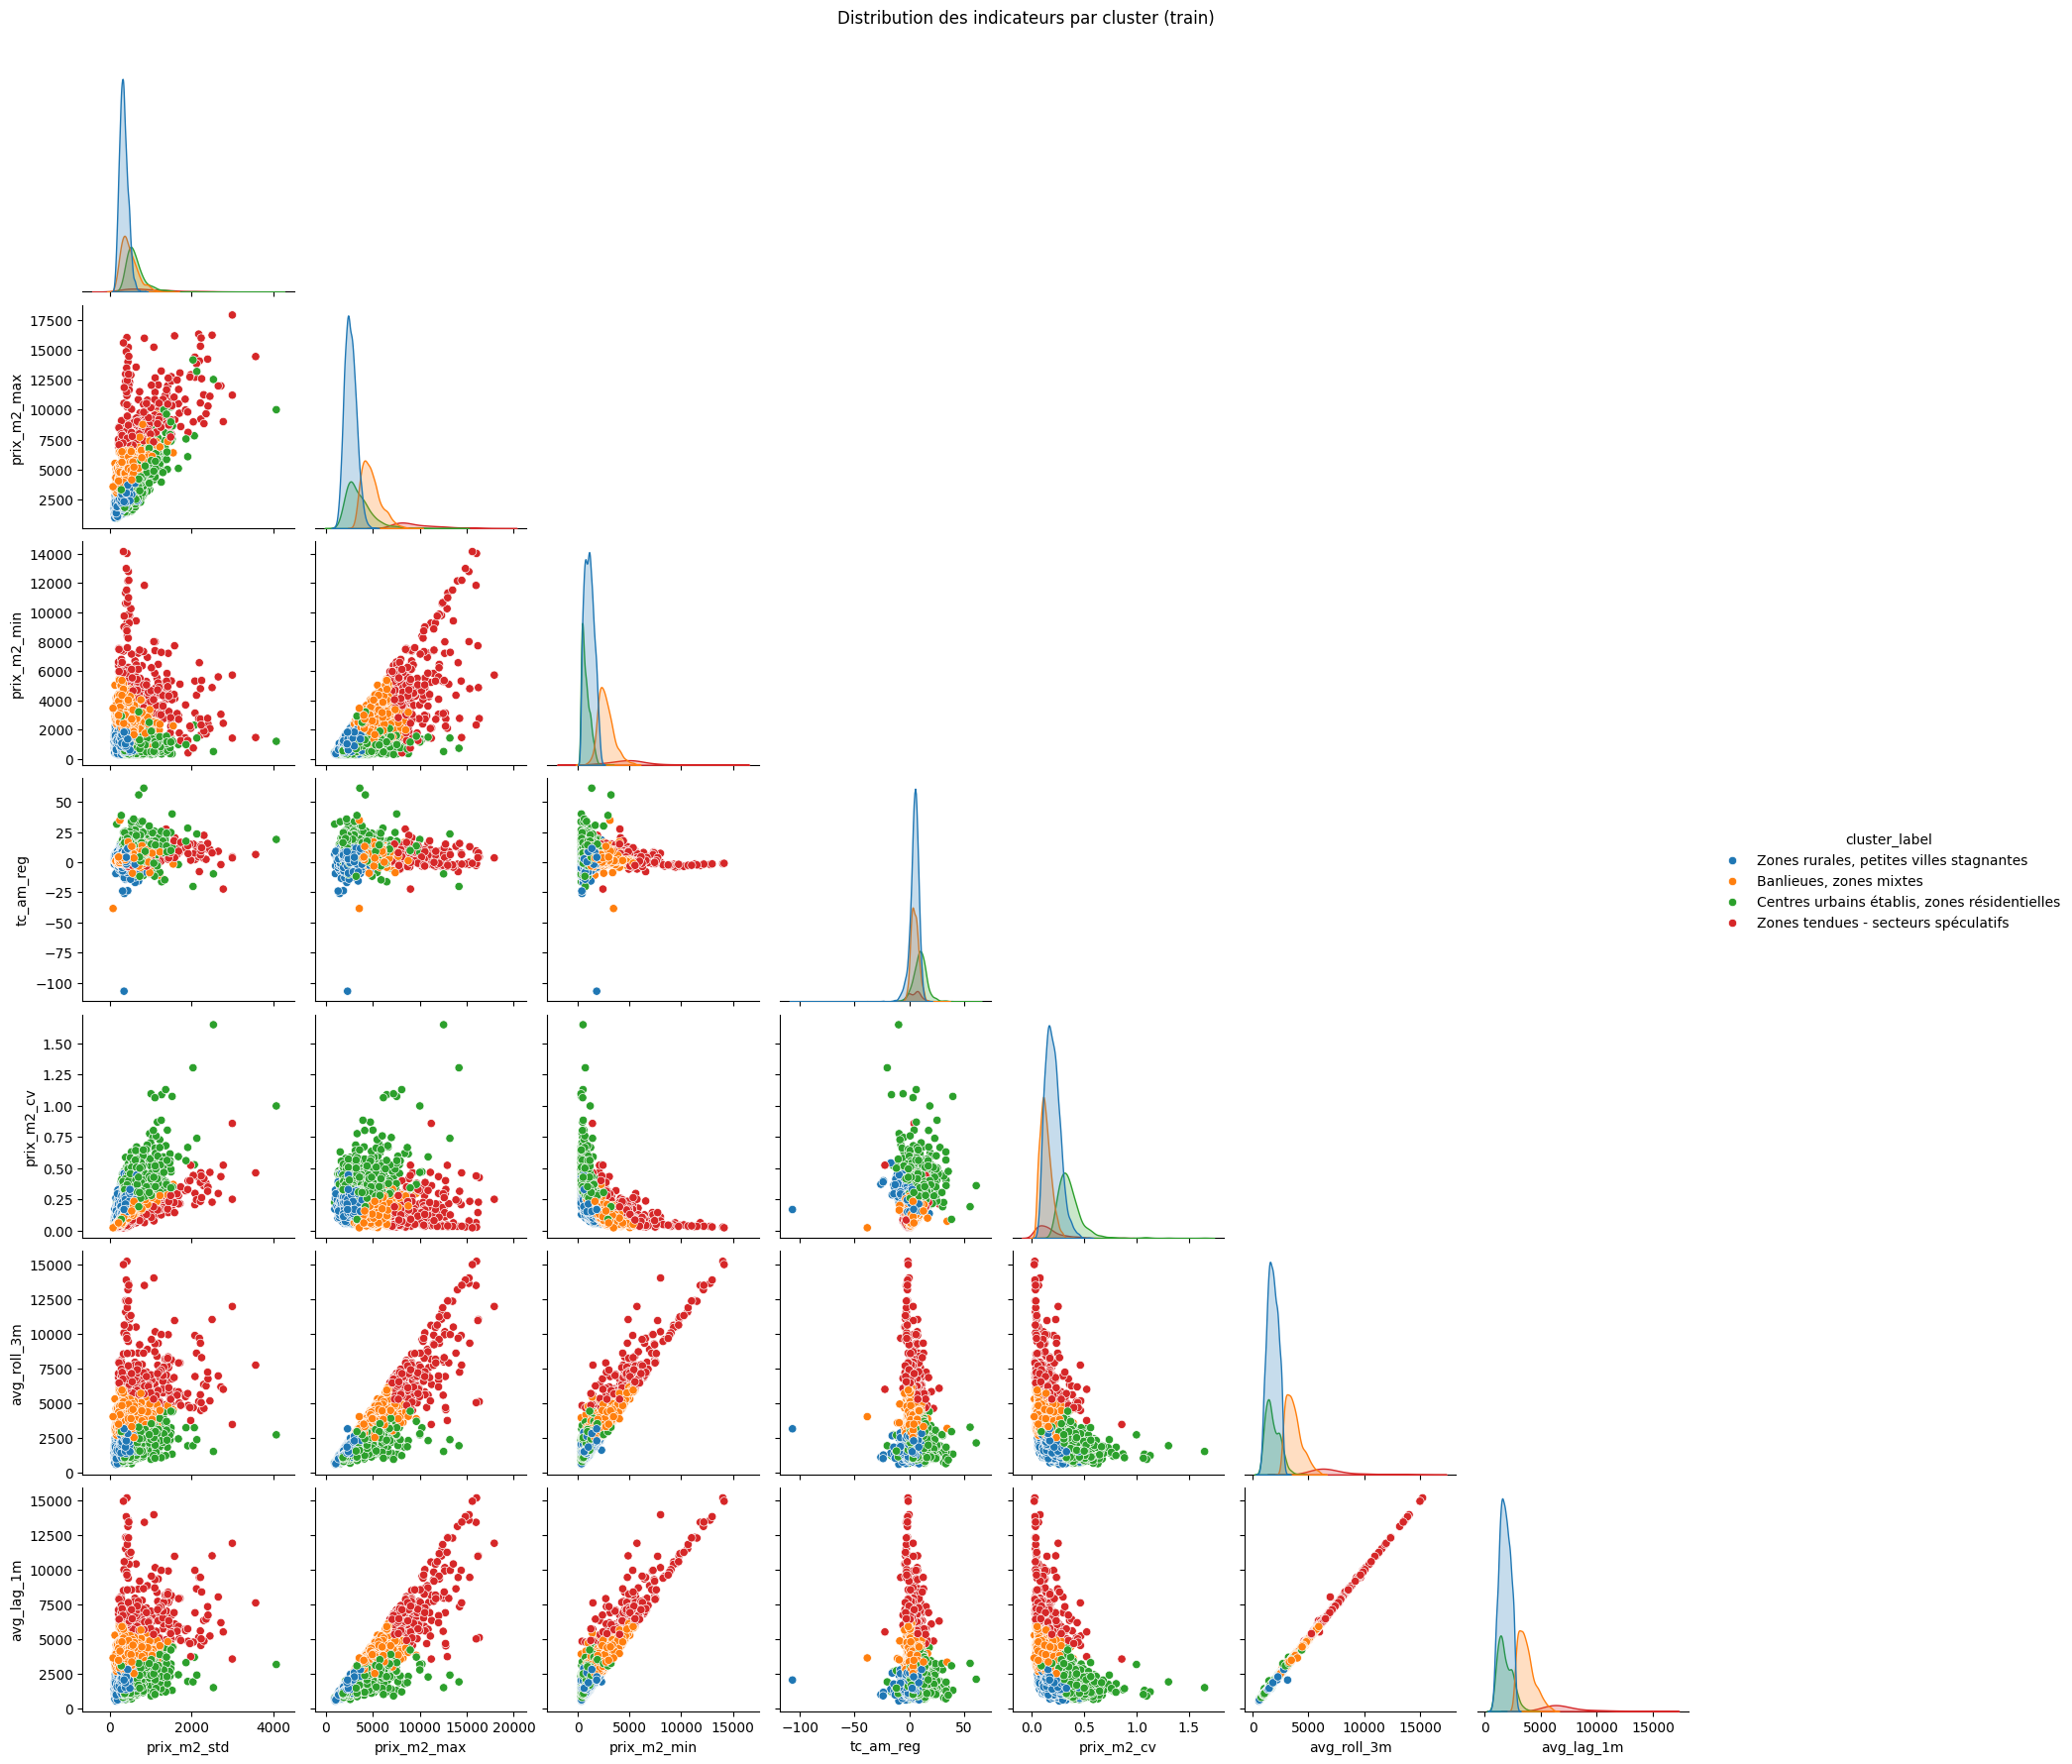

In [61]:
cluster_palette = {
    "Zones rurales, petites villes stagnantes":    "#1f77b4",
    "Banlieues, zones mixtes":                    "#ff7f0e",
    "Centres urbains √©tablis, zones r√©sidentielles":"#2ca02c",
    "Zones tendues - secteurs sp√©culatifs":        "#d62728",
}

# visualisation
sns.pairplot(
    df_cluster_input,
    vars=features,
    hue="cluster_label",
    hue_order=list(cluster_palette.keys()),
    palette=cluster_palette,
    corner=True            # pour n‚Äôafficher que la moiti√© inf√©rieure et gagner en lisibilit√©
)
plt.suptitle("Distribution des indicateurs par cluster (train)", y=1.02)
plt.show()



| Cluster |  Couleur  | Niveau de prix |    Volatilit√©   |    Croissance (tc\_am\_reg)   | Interpr√©tation √©conomique                                       |
| :-----: | :-------: | :------------: | :-------------: | :---------------------------: | :-------------------------------------------------------------- |
|    0    |  üîµ Bleu  |   **Faible**   | **Tr√®s faible** | **Faible / parfois n√©gative** | **Zones rurales / petites villes stagnantes**                   |
|    1    | üü† Orange |  **Moyen-bas** |   **Mod√©r√©e**   |          **Mod√©r√©e**          | **P√©riph√©ries et banlieues**                   |
|    2    |  üü¢ Vert  | **Moyen-haut** |   **Mod√©r√©e**   |      **Mod√©r√©e √† bonne**      | **Centres urbains √©tablis, march√©s r√©sidentiels stables**       |
|    3    |  üî¥ Rouge | **Tr√®s √©lev√©** |    **√âlev√©e**   |           **Forte**           | **Zones tendues / sp√©culatives (luxe, hypercentre, littoral‚Ä¶)** |


### Visualisation sur une map

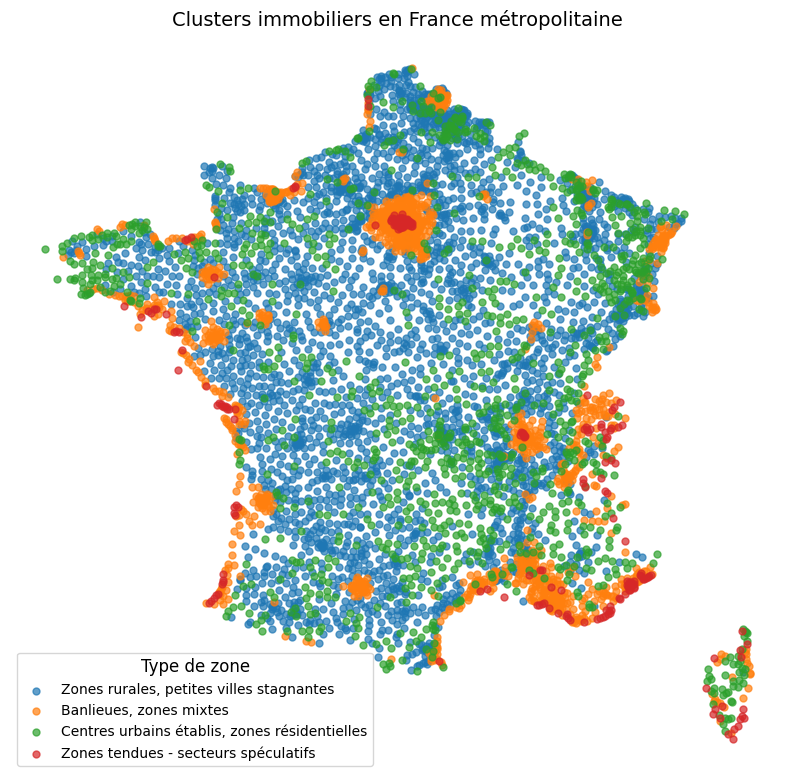

C:\Users\charl\AppData\Local\Temp\ipykernel_27452\3451202757.py:85: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




C:\Users\charl\AppData\Local\Temp\ipykernel_27452\3451202757.py:85: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




C:\Users\charl\AppData\Local\Temp\ipykernel_27452\3451202757.py:85: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




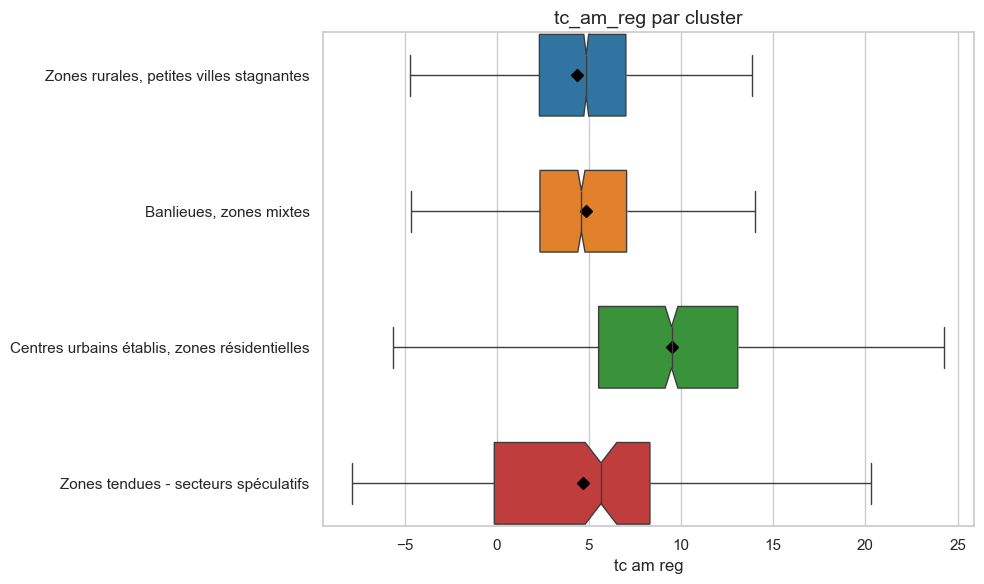

C:\Users\charl\AppData\Local\Temp\ipykernel_27452\3451202757.py:85: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




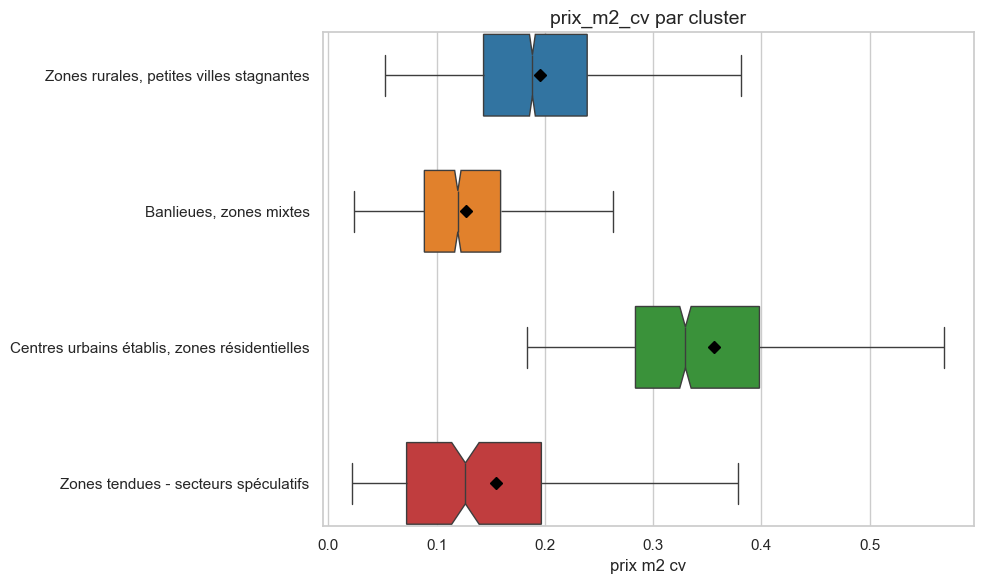

C:\Users\charl\AppData\Local\Temp\ipykernel_27452\3451202757.py:85: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




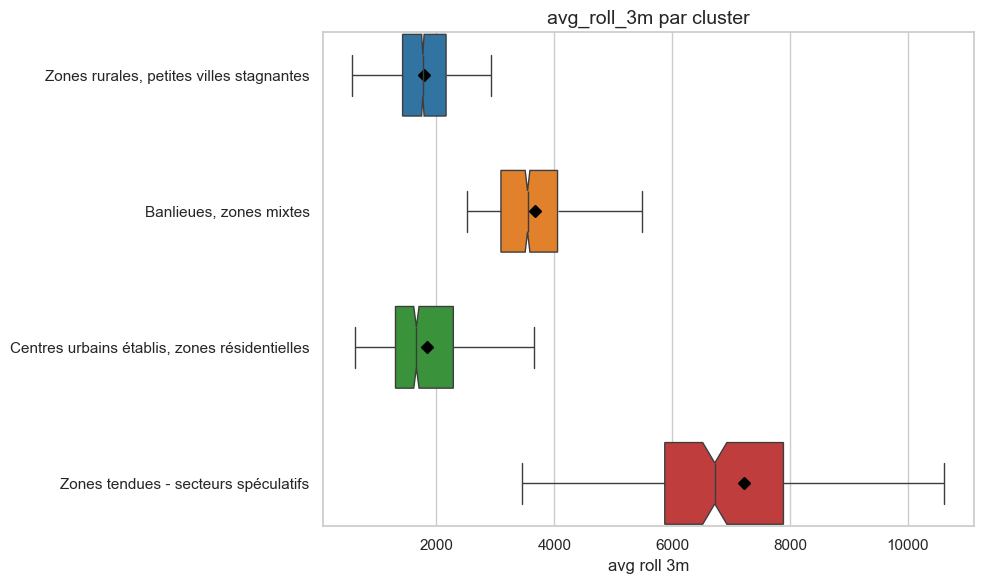

C:\Users\charl\AppData\Local\Temp\ipykernel_27452\3451202757.py:85: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




In [63]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import matplotlib.patches as mpatches

# ‚îÄ‚îÄ 0. Pr√©parer la liste des codes postaux fr√©quents ‚îÄ‚îÄ
cp_counts       = train_clean["codePostal"].value_counts()
cp_frequents_str = set(cp_counts[cp_counts >= 10].index.astype(str))

# ‚îÄ‚îÄ 1. Fonction ‚Äústring-only‚Äù pour regrouper les codes postaux ‚îÄ‚îÄ
def regroup_code_str(cp: str, freq_set: set) -> str:
    if cp in freq_set:
        return cp
    if cp.startswith("97"):
        return cp[:3]
    if cp.isdigit() and len(cp) == 5:
        return cp[:2]
    return "inconnu"

# ‚îÄ‚îÄ 2. Calculer les centro√Ødes (lat/lon moyennes) par codePostal ‚îÄ‚îÄ
coord_cp = (
    train_clean
    .dropna(subset=["mapCoordonneesLatitude", "mapCoordonneesLongitude"])
    .groupby("codePostal")[["mapCoordonneesLatitude","mapCoordonneesLongitude"]]
    .mean()
    .reset_index()
)

# ‚îÄ‚îÄ 3. Appliquer le regroupement et reconstruire codePostal_recons ‚îÄ‚îÄ
coord_cp["zone_mixte"]        = coord_cp["codePostal"].astype(str).apply(
    lambda cp: regroup_code_str(cp, cp_frequents_str)
)
coord_cp["codePostal_recons"] = coord_cp["zone_mixte"].apply(get_code_postal_final)

# ‚îÄ‚îÄ 4. Fusionner avec votre df_cluster_input (qui porte cluster & cluster_label) ‚îÄ‚îÄ
geo_df = pd.merge(
    df_cluster_input.reset_index(),  # attention: index doit devenir col. r√©indexez sinon
    coord_cp[["codePostal_recons","mapCoordonneesLatitude","mapCoordonneesLongitude"]],
    on="codePostal_recons",
    how="left"
).dropna(subset=["mapCoordonneesLatitude","mapCoordonneesLongitude"])

# ‚îÄ‚îÄ 5. Transformer en GeoDataFrame ‚îÄ‚îÄ
geometry = [
    Point(xy) for xy in zip(
        geo_df["mapCoordonneesLongitude"],
        geo_df["mapCoordonneesLatitude"]
    )
]
geo_df = gpd.GeoDataFrame(geo_df, geometry=geometry, crs="EPSG:4326")

# Optionnel : ne garder que la m√©tropole
geo_df = geo_df[~geo_df["codePostal_recons"].str.startswith(("97","98"))]

# ‚îÄ‚îÄ 6. Choisir une palette de couleurs sur les labels ‚îÄ‚îÄ


# ‚îÄ‚îÄ 7. Tracer la carte en boucle pour une l√©gende propre ‚îÄ‚îÄ
fig, ax = plt.subplots(figsize=(10,12))
for lbl, color in cluster_palette.items():
    subset = geo_df[geo_df["cluster_label"] == lbl]
    subset.plot(
        ax=ax,
        color=color,
        markersize=25,
        alpha=0.7,
        label=lbl
    )
ax.legend(title="Type de zone", loc="lower left", fontsize=10, title_fontsize=12)
ax.set_title("Clusters immobiliers en France m√©tropolitaine", fontsize=14)
ax.axis("off")
plt.show()

# ‚îÄ‚îÄ 8. Boxplots explicatifs par cluster ‚îÄ‚îÄ
features_box = ["prix_m2_mean","prix_m2_std","tc_am_reg","prix_m2_cv","avg_roll_3m","avg_lag_1m"]
sns.set_theme(style="whitegrid", palette="pastel")

order = list(cluster_palette.keys())

for feat in features_box:
    plt.figure(figsize=(10, 6))
    
    ax = sns.boxplot(
        y="cluster_label",           # on bascule en horizontal
        x=feat,
        data=geo_df,
        order=order,
        palette=cluster_palette,
        notch=True,                  # crans
        showfliers=False,            # pas les outliers extr√™mes
        width=0.6
    )
    
    # Superposer les moyennes
    means = geo_df.groupby("cluster_label")[feat].mean().reindex(order)
    for i, m in enumerate(means):
        ax.plot(m, i, marker="D", color="black", label="_nolegend_")
    
    ax.set_title(f"{feat} par cluster", fontsize=14)
    ax.set_xlabel(feat.replace("_", " "), fontsize=12)
    ax.set_ylabel("")  # on conserve seulement le label des clusters
    plt.tight_layout()
    plt.show()

##### Cluster ‚ÄúZones rurales, petites villes stagnantes‚Äù (0 ‚Äì üîµ Bleu)

- **Position** : tout en bas √† gauche du pairplot (prix et volatilit√© tr√®s faibles).  
- **Prix** : niveaux tr√®s bas, bo√Ætes compactes autour de la m√©diane.  
- **Volatilit√© (std)** : quasi nulle, march√© extr√™mement homog√®ne.  
- **TCAM** : souvent n√©gatif ou proche de 0 % (march√© en l√©g√®re d√©croissance ou plat).  
- **Interpr√©tation** : zones rurales ou petites communes sans dynamisme immobilier.  

---

##### Cluster ‚ÄúP√©riph√©ries et banlieues en d√©veloppement‚Äù (1 ‚Äì üü† Orange)

- **Position** : nuage m√©dian-bas du pairplot, dispersion interm√©diaire.  
- **Prix** : moyens mod√©r√©s (un cran au-dessus du rural), avec quelques valeurs plus hautes.  
- **Volatilit√© (std)** : mod√©r√©e ‚Äì pr√©sence de segments plus chers ou r√©cents √† c√¥t√© d‚Äôanciens.  
- **TCAM** : mod√©r√©ment positif (3‚Äì6 % typiquement), t√©moignant d‚Äôune croissance en rattrapage.  
- **Interpr√©tation** : zones p√©riurbaines, communes mixtes ou en renouvellement, march√©s en pleine √©mergence.  

---

##### Cluster ‚ÄúCentres urbains √©tablis, zones r√©sidentielles stables‚Äù (2 ‚Äì üü¢ Vert)

- **Position** : nuage m√©dian-haut, forte concentration autour de prix √©lev√©s mais volatilit√© limit√©e.  
- **Prix** : moyens hauts, bo√Ætes serr√©es indiquant un march√© homog√®ne et mature.  
- **Volatilit√© (std)** : contenue ‚Äì peu d‚Äô√©carts extr√™mes.  
- **TCAM** : positif mod√©r√© (5‚Äì8 %), croissance stable et pr√©visible.  
- **Interpr√©tation** : c≈ìurs de villes √©tablies, quartiers r√©sidentiels haut de gamme, march√©s matures.  

---

##### Cluster ‚ÄúZones tendues ‚Äì secteurs sp√©culatifs‚Äù (3 ‚Äì üî¥ Rouge)

- **Position** : tout en haut √† droite, points tr√®s √©lev√©s sur prix et dispersion.  
- **Prix** : tr√®s √©lev√©s (m√©dianes et max au sommet), large bo√Æte signalant de fortes disparit√©s.  
- **Volatilit√© (std)** : √©lev√©e ‚Äì m√©lange de biens tr√®s chers et de transactions sp√©culatives.  
- **TCAM** : souvent sup√©rieur √† 10 %, croissance soutenue par la sp√©culation et la pression de la demande.  
- **Interpr√©tation** : hypercentre, zones touristiques ou littorales, march√©s tr√®s tendus et sp√©culatifs.  


## V√©rifications et export des donn√©es

In [64]:
# Etape 4: export des donn√©es
display(test_clean.head())
display(test_clean["cluster"].value_counts())
# Et en pourcentage du total
print(test_clean["cluster"].value_counts(normalize=True) * 100)

date typedebien typedetransaction  etage  surface  surface_terrain  \
0 2024-06-01          m                 v    0.0    275.0              NaN   
1 2024-08-01          m                 v    0.0    225.0           1000.0   
2 2024-10-01          m                 v    0.0    229.0              NaN   
3 2024-11-01          m                 v    0.0    198.0           1030.0   
4 2025-02-01          m                 v    0.0    220.0           1000.0   

   nb_pieces  balcon  eau  bain  ... codePostal_recons  prix_m2_std  \
0        7.0       0  0.0   0.0  ...             01000   469.208451   
1        6.0       0  0.0   0.0  ...             01000   469.208451   
2        7.0       0  0.0   0.0  ...             01000   469.208451   
3        7.0       0  1.0   2.0  ...             01000   469.208451   
4        6.0       0  0.0   0.0  ...             01000   469.208451   

   prix_m2_max  prix_m2_min  tc_am_reg  prix_m2_cv  avg_roll_3m   avg_lag_1m  \
0       4875.0  1835.048889   4.338907    0.197359   2363.00772  2366.589718   
1       4875.0  1835.048889   4.338907    0.197359   2363.00772  2366.589718   
2       4875.0  1835.048889   4.338907    0.197359   2363.00772  2366.589718   
3       4875.0  1835.048889   4.338907    0.197359   2363.00772  2366.589718   
4       4875.0  1835.048889   4.338907    0.197359   2363.00772  2366.589718   

  cluster                             cluster_label  
0     0.0  Zones rurales, petites villes stagnantes  
1     0.0  Zones rurales, petites villes stagnantes  
2     0.0  Zones rurales, petites villes stagnantes  
3     0.0  Zones rurales, petites villes stagnantes  
4     0.0  Zones rurales, petites villes stagnantes  

[5 rows x 110 columns]

cluster
3.0    569728
0.0    547456
2.0    131071
1.0     72612
Name: count, dtype: int64

cluster
3.0    43.132882
0.0    41.446716
2.0     9.923104
1.0     5.497298
Name: proportion, dtype: float64


## Pr√©paration Encodage des facteurs exog√®nes pour SARIMAX

### Cr√©ation d'une liste de facteurs exog√®nes

In [65]:
variables_exp = ["taux_rendement_n7", "loyer_m2_median_n7","y_geo", "x_geo", "z_geo", "dpeL", "nb_pieces", 'IPS_primaire','rental_yield_pct']

Pour notre mod√©lisation, nous allons choisir SARIMAX
Pour cela nous aurons besoin de preprocesser et encoder nos facteurs exog√®nes

### Preprocessing du dataset pour SARIMAX
Nous allons prendre les Top 10 features issus de la feature selection (Part-2) ainsi que d'autres variables macro-eco (IPS, %chomage, %Taux immobilier...)
'taux_rendement_n7', 'loyer_m2_median_n7', 'y_geo', 'x_geo', 'z_geo', 'taux_rendement_n6', 'nb_pieces' 

Pour le taux d'emprunt immobilier, nous avons pris le taux d'emprunt √† 10 ans, de part le fait que l'information est compl√®te

#### Variables pour SARIMAX : encodage et standardisation

##### Encodage de la variable g√©ographique

In [66]:
# ENCODAGE DES VARIABLES GEOGRAPHIQUES
import numpy as np

lat_rad = np.radians(train_clean["mapCoordonneesLatitude"].values)
lon_rad = np.radians(train_clean["mapCoordonneesLongitude"].values)

# Projection sur la sph√®re unit√© :

### X_Train ###
train_clean["x_geo"] = np.cos(lat_rad) * np.cos(lon_rad)
train_clean["y_geo"] = np.cos(lat_rad) * np.sin(lon_rad)
train_clean["z_geo"] = np.sin(lat_rad)

### X_Test ###
lat_rad_test = np.radians(test_clean["mapCoordonneesLatitude"].values)
lon_rad_test = np.radians(test_clean["mapCoordonneesLongitude"].values)
test_clean["x_geo"] = np.cos(lat_rad_test) * np.cos(lon_rad_test)
test_clean["y_geo"] = np.cos(lat_rad_test) * np.sin(lon_rad_test)
test_clean["z_geo"] = np.sin(lat_rad_test)

# Les valeurs retourn√©s sont comprises entre -1 et 1
# z est la latitude absolue (Nord /sud)
# x > 0 ‚Üí vers l‚ÄôEst (Greenwich ‚Üí 90¬∞ E)
# x < 0 ‚Üí vers l‚ÄôOuest (Greenwich ‚Üí 90¬∞ O)
# y > 0 ‚Üí moiti√© Nord de l‚Äô√©quateur (longitudes entre 0¬∞ et 180¬∞ E)
# y < 0 ‚Üí moiti√© Sud (longitudes entre 0¬∞ et 180¬∞ O)

# suppression des colonnes Latitude et Longitude
train_clean = train_clean.drop(
    columns=["mapCoordonneesLongitude", "mapCoordonneesLatitude"]
)
test_clean = test_clean.drop(
    columns=["mapCoordonneesLongitude", "mapCoordonneesLatitude"]
)

# Verification
print(test_clean.head())
print(train_clean.head())

        date typedebien typedetransaction  etage  surface  surface_terrain  \
0 2024-06-01          m                 v    0.0    275.0              NaN   
1 2024-08-01          m                 v    0.0    225.0           1000.0   
2 2024-10-01          m                 v    0.0    229.0              NaN   
3 2024-11-01          m                 v    0.0    198.0           1030.0   
4 2025-02-01          m                 v    0.0    220.0           1000.0   

   nb_pieces  balcon  eau  bain  ...  prix_m2_min  tc_am_reg  prix_m2_cv  \
0        7.0       0  0.0   0.0  ...  1835.048889   4.338907    0.197359   
1        6.0       0  0.0   0.0  ...  1835.048889   4.338907    0.197359   
2        7.0       0  0.0   0.0  ...  1835.048889   4.338907    0.197359   
3        7.0       0  1.0   2.0  ...  1835.048889   4.338907    0.197359   
4        6.0       0  0.0   0.0  ...  1835.048889   4.338907    0.197359   

   avg_roll_3m   avg_lag_1m cluster                             cluster_la

##### Encodage dpeL

In [67]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# creation d'une pipeline pour faire un imputer et un encodage
impute = SimpleImputer(strategy="most_frequent")
encode = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
train_clean["dpeL"] = train_clean["dpeL"].astype(str)
test_clean["dpeL"] = test_clean["dpeL"].astype(str)
# On cr√©e une pipeline pour le pr√©traitement
pipeline = Pipeline(steps=[("imputer", impute), ("encoder", encode)])
# On applique la pipeline sur les colonnes cat√©gorielles

train_clean["dpeL"] = pipeline.fit_transform(train_clean["dpeL"].values.reshape(-1, 1))
test_clean["dpeL"] = pipeline.transform(test_clean["dpeL"].values.reshape(-1, 1))

# Afficher les r√©sultats
print("train_clean['dpeL'] apr√®s transformation :")
print(train_clean["dpeL"].unique())
print("test_clean['dpeL'] apr√®s transformation :")
print(test_clean["dpeL"].unique())

train_clean['dpeL'] apr√®s transformation :
[5. 3. 4. 9. 2. 6. 7. 8. 1. 0.]
test_clean['dpeL'] apr√®s transformation :
[3. 1. 2. 5. 4. 7. 0. 6. 9. 8.]


##### Ajout de la variable cluster √† train_data (donn√©e non agr√©g√©e)

In [ ]:

# 2. Positionnez df_cluster_input pour un mapping rapide
cluster_map = df_cluster_input.set_index("codePostal_recons")
train_clean["codePostal_recons"] = (train_clean["zone_mixte"].apply(get_code_postal_final))

train_clean['cluster'] = train_clean["codePostal_recons"].map(cluster_map['cluster'])

# 4. Vos autres features propres √† train_clean restent :
#    "taux_rendement_n7", "loyer_m2_median_n7", "y_geo", "x_geo", "z_geo"

# R√©sultat : train_clean contient maintenant toutes les variables_exp
print(train_clean.head())



              date typedebien typedetransaction  etage  surface  \
684826  2020-10-01          m                 v    0.0     88.0   
2744289 2023-05-01          m                 v    0.0    250.0   
1869    2020-01-01          a                 v    4.0     92.0   
3048    2020-01-01          m                 v    0.0    147.0   
5868    2020-01-01          m                 v    0.0    169.0   

         surface_terrain  nb_pieces  balcon  eau  bain  ...  codePostal  \
684826               NaN        4.0       0  0.0   0.0  ...       01710   
2744289           1500.0        7.0       0  1.0   2.0  ...       01710   
1869                 NaN        5.0       0  0.0   1.0  ...       01000   
3048               592.0        7.0       0  0.0   0.0  ...       01000   
5868               866.0        6.0       0  1.0   1.0  ...       01000   

         departement  zone_mixte  prix_lag_1m  prix_roll_3m     x_geo  \
684826            01          01          NaN           NaN  0.687819   


##### Standardisation des facteurs exog√®nes

In [69]:
# Standardisation des variables num√©riques
from sklearn.preprocessing import StandardScaler


# Cr√©er une instance de StandardScaler
scaler = StandardScaler()

# Ajuster le scaler sur les donn√©es d'entra√Ænement
train_clean[variables_exp] = scaler.fit_transform(train_clean[variables_exp])

# Appliquer la transformation sur les donn√©es de test
test_clean[variables_exp] = scaler.transform(test_clean[variables_exp])

# V√©rification de la standardisation
print(train_clean[variables_exp].head())
print(test_clean[variables_exp].head())

         taux_rendement_n7  loyer_m2_median_n7     y_geo     x_geo     z_geo  \
684826           -0.362139            0.475458  0.630410  0.092152  0.004261   
2744289          -0.496360           -0.254271  0.631334  0.091316  0.004608   
1869              0.756364           -0.874062  0.504184  0.134695 -0.004576   
3048             -0.048958           -1.191127  0.501141  0.138621 -0.006420   
5868             -0.138439           -0.929827  0.502970  0.140208 -0.007499   

             dpeL  nb_pieces  IPS_primaire  rental_yield_pct  
684826   0.155384  -0.146231     -0.712686               NaN  
2744289 -0.565063   1.356049     -0.712686               NaN  
1869    -0.565063   0.354529      0.310099               NaN  
3048    -0.565063   1.356049      0.310099               NaN  
5868    -0.204840   0.855289      0.310099               NaN  
   taux_rendement_n7  loyer_m2_median_n7     y_geo     x_geo     z_geo  \
0          -0.317399           -0.254271  0.631295  0.091854  0.004

### Creation d'un dataframe Monthly avec variables standardis√©s pour SARIMAX

In [70]:
# Regroupement mensuel par cluster ‚Äì uniquement sur le train
variables_exp = [
    col for col in variables_exp if col not in ("cluster", "date")
]  # Regroupement mensuel par cluster (train uniquement)
# On regroupe par cluster et date
agg_cluster_monthly = (
    train_clean.groupby(["cluster", "date"], as_index=False)
    .agg({**{"prix_m2_vente": "mean"}, **{col: "mean" for col in variables_exp  }})
    .reset_index()
)

# Ajouter un indicateur split train/test pour plus tard (test sera pr√©dit s√©par√©ment)
agg_cluster_monthly["split"] = "train"

# Export s√©curis√© sans data leak
# agg_cluster_monthly.to_csv("agg_cluster_monthly.csv", index=False)



# Regroupement mensuel par cluster (test uniquement)
agg_cluster_monthly_test = test_clean.groupby(["cluster", "date"], as_index=False).agg(
    {"prix_m2_vente": "mean", **{col: "mean" for col in variables_exp}}
)
# Ajouter un indicateur split
agg_cluster_monthly_test["split"] = "test"

# Export pour inspection
# agg_cluster_monthly_test.to_csv("agg_cluster_monthly_test.csv", index=False)

#### Agr√©gation par mois et Cr√©ation de la variable taux d'emprunt immobilier

In [ ]:
# !pip install openpyxl

In [71]:
train_periodique_q12 = (
    agg_cluster_monthly[agg_cluster_monthly["split"] == "train"]
    .set_index("date")
    .drop(columns=["split"])
)
test_periodique_q12 = (
    agg_cluster_monthly_test[agg_cluster_monthly_test["split"] == "test"]
    .set_index("date")
    .drop(columns=["split"])
)


# display(train_periodique_q12.head(5))

##############################################################################
# Importer les donn√©es de taux d'int√©r√™t
################################################################################
# Chemins d'acc√®s aux fichiers

# chemin_taux_M = '/Users/maximehenon/Documents/GitHub/MAR25_BDS_Compagnon_Immo/data'
chemin_taux_Y = ("C:/Users/charl/OneDrive/Documents/Yasmine/DATASCIENTEST/FEV25-BDS-COMPAGNON/data")
# chemin_taux_C = '../data/banking'
# chemin_taux_L = '/Users/loick.d/Documents/Datascientest/Github immo/MAR25_BDS_Compagnon_Immo/data'

chemin_taux = os.path.join(chemin_taux_Y, "Taux immo.xlsx")
# chemin_taux = os.path.join(chemin_taux_C, 'Taux immo.xlsx')
# chemin_taux = os.path.join(chemin_taux_L, 'Taux immo.xlsx')
# chemin_taux = os.path.join(chemin_taux_M, 'Taux immo.xlsx')

# Importer les taux d'int√©r√™t
import pandas as pd

taux = pd.read_excel(chemin_taux)
taux["date"] = pd.to_datetime(taux["date"], format="%Y-%m-%d")
taux = taux.set_index("date")
taux["taux"] = (
    taux["10 ans"].str.replace("%", "").str.replace(",", ".").str.strip().astype(float)
)
# display(taux.head(5))

# Fusionner les donn√©es de taux d'int√©r√™t avec les donn√©es d'agr√©gation mensuelle
train_periodique_q12 = train_periodique_q12.merge(
    taux, left_index=True, right_index=True, how="left"
)
test_periodique_q12 = test_periodique_q12.merge(
    taux, left_index=True, right_index=True, how="left"
)

# V√©rification de la fusion
# display(train_periodique_q12.head(5))


# Standardisation des taux d'int√©r√™t
scal = StandardScaler()
train_periodique_q12["taux"] = scal.fit_transform(train_periodique_q12[["taux"]])
test_periodique_q12["taux"] = scal.transform(test_periodique_q12[["taux"]])
# V√©rification de la standardisation
# print(train_periodique_q12.head())
# print(test_periodique_q12['taux'].head())
train_periodique_q12 = train_periodique_q12.reset_index()
test_periodique_q12 = test_periodique_q12.reset_index()

train_periodique_q12["prix_m2_vente"] = np.log(train_periodique_q12["prix_m2_vente"])
test_periodique_q12["prix_m2_vente"] = np.log(test_periodique_q12["prix_m2_vente"])


# Ne garder que les colonnes variables_exp
variables_exp = ["taux_rendement_n7", "loyer_m2_median_n7","y_geo", "x_geo", "z_geo", "dpeL", "nb_pieces", 'IPS_primaire','rental_yield_pct', 'taux']

train_periodique_q12 = train_periodique_q12[
    variables_exp + ["prix_m2_vente", "cluster", "date"]
]
test_periodique_q12 = test_periodique_q12[
    variables_exp + ["prix_m2_vente", "cluster", "date"]
]
# V√©rification de la structure finale
print(train_periodique_q12.head())
print(test_periodique_q12.head())

   taux_rendement_n7  loyer_m2_median_n7     y_geo     x_geo     z_geo  \
0           0.982523           -0.750876 -0.021392  0.059856 -0.051658   
1           0.843566           -0.614714 -0.253039 -0.079532 -0.236455   
2          -0.454377            1.193485  0.283960  0.240464 -0.084317   
3           0.074218            0.073472  0.068218  0.261201 -0.185299   
4           0.812673           -0.709808 -0.004202 -0.048630 -0.014405   

       dpeL  nb_pieces  IPS_primaire  rental_yield_pct      taux  \
0  0.082899   0.331840     -0.450807          0.862490 -0.624802   
1  0.286180   0.394876     -0.360789          0.678596 -0.624802   
2  0.206438  -0.335212      0.586141         -1.289374 -0.624802   
3  0.059561  -0.129143      0.125403         -0.415850 -0.624802   
4  0.084086   0.205932     -0.406964          0.772855 -0.624802   

   prix_m2_vente  cluster       date  
0       7.408758      0.0 2020-01-01  
1       7.474197      1.0 2020-01-01  
2       8.860088      2.0 202

## Export des datasets

In [72]:
# # Enregistrer le DataFrame final
train_periodique_q12.to_csv(
    os.path.join(folder_path_Y, "train_periodique_q12.csv"), sep=";", index=True
)
test_periodique_q12.to_csv(
    os.path.join(folder_path_Y, "test_periodique_q12.csv"), sep=";", index=True
)

# folder_path_M = ''
# folder_path_L = ''
# folder_path_C = '../data/processed/Sales'

# train_periodique_q12.to_csv(os.path.join(folder_path_C, 'train_periodique_q12.csv'), sep=';', index=True)
# test_periodique_q12.to_csv(os.path.join(folder_path_C, 'test_periodique_q12.csv'), sep=';', index=True)

# train_periodique_q12.to_csv(os.path.join(folder_path_M, 'train_periodique_q12.csv'), sep=';', index=True)
# test_periodique_q12.to_csv(os.path.join(folder_path_M, 'test_periodique_q12.csv'), sep=';', index=True)

# train_periodique_q12.to_csv(os.path.join(folder_path_L, 'train_periodique_q12.csv'), sep=';', index=True)
# test_periodique_q12.to_csv(os.path.join(folder_path_L, 'test_periodique_q12.csv'), sep=';', index=True)


# Enregistrer les dataset Train_clean et test_clean
train_clean.to_csv(os.path.join(folder_path_Y, "train_clean_ST.csv"), sep=";", index=True)
test_clean.to_csv(os.path.join(folder_path_Y, "test_clean_ST.csv"), sep=";", index=True)

# train_clean.to_csv(os.path.join(folder_path_C, "train_clean_ST.csv"), sep=";", index=True)
# test_clean.to_csv(os.path.join(folder_path_C, "test_clean_ST.csv"), sep=";", index=True)

# train_clean.to_csv(os.path.join(folder_path_M, 'train_clean.csv'), sep=';', index=True)
# test_clean.to_csv(os.path.join(folder_path_M, 'test_clean.csv'), sep=';', index=True)

# train_clean.to_csv(os.path.join(folder_path_L, 'train_clean.csv'), sep=';', index=True)
# test_clean.to_csv(os.path.join(folder_path_L, 'test_clean.csv'), sep=';', index=True)